<a href="https://colab.research.google.com/github/cowiety/cowiety/blob/main/drawingreader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 1.4 MB/s 


In [3]:
!pip install boxdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=7babfff5a8cbe1ef2e0cc22cc8e83526826dfe78d6b6dd8443b6fe63e061c82f
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [6]:
import rasterio
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as plotimg
%matplotlib inline

In [15]:
path = 'NK21-1E-65150-00178.CAL'
src = rasterio.open(path)
input_img = src.read(1)

/usr/local/lib/python3.7/dist-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


image preview

In [9]:
plotimg.imsave('test.png', input_img)

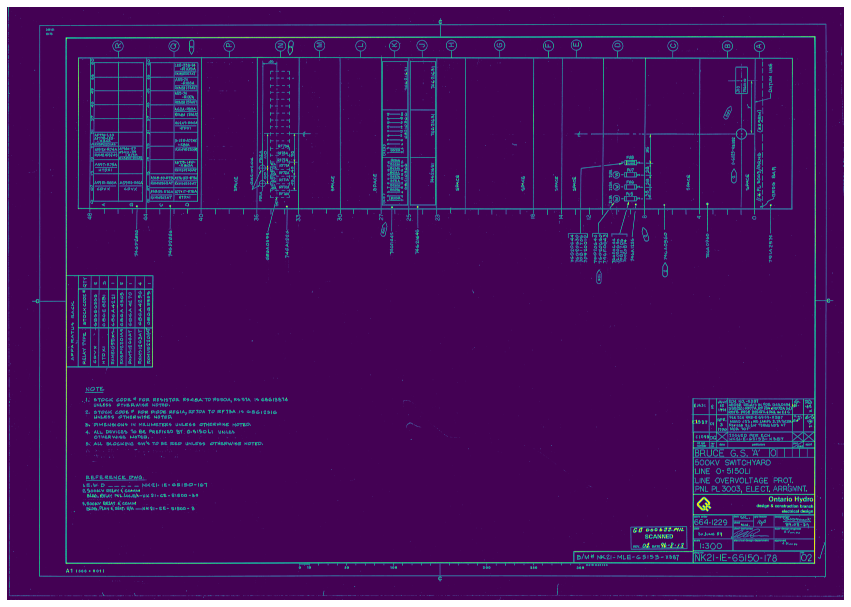

In [10]:
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(input_img)
plt.show()

configuration

In [11]:
from boxdetect import config

In [12]:
cfg = config.PipelinesConfig()

cfg.width_range = (405, 425)
cfg.height_range = (225, 475)
cfg.scaling_factors = [1.0]

cfg.wh_ratio_range = (0.85, 1.85)
cfg.group_size_range = (1, 30)
cfg.morph_kernels_type = 'rectangles'

cfg.dilation_iterations = 0

results

In [13]:
from boxdetect.pipelines import get_boxes

In [ ]:
rects, grouping_rects, image, ouput_image = get_boxes('test.png', cfg=cfg, plot=False)

Processing file:  test.png


In [16]:
print(rects)

[[1651 1274   95   42]
 [1554 1274   96   42]
 [ 346  772  109   68]
 [ 345  685  109   70]
 [ 342  631   86   40]
 [ 348  465  106  150]
 [ 345  375  111   72]
 [1621  299   90   46]
 [1522  299   98   78]
 [ 344  206  110  153]
 [ 811  186  125   70]
 [ 681  186  124   71]
 [1620  152   90   70]
 [1340  151  112   62]]


In [17]:
from boxdetect.img_proc import draw_rects, get_image

Processing file:  NK21-CE-65150-00102_ex.jpg


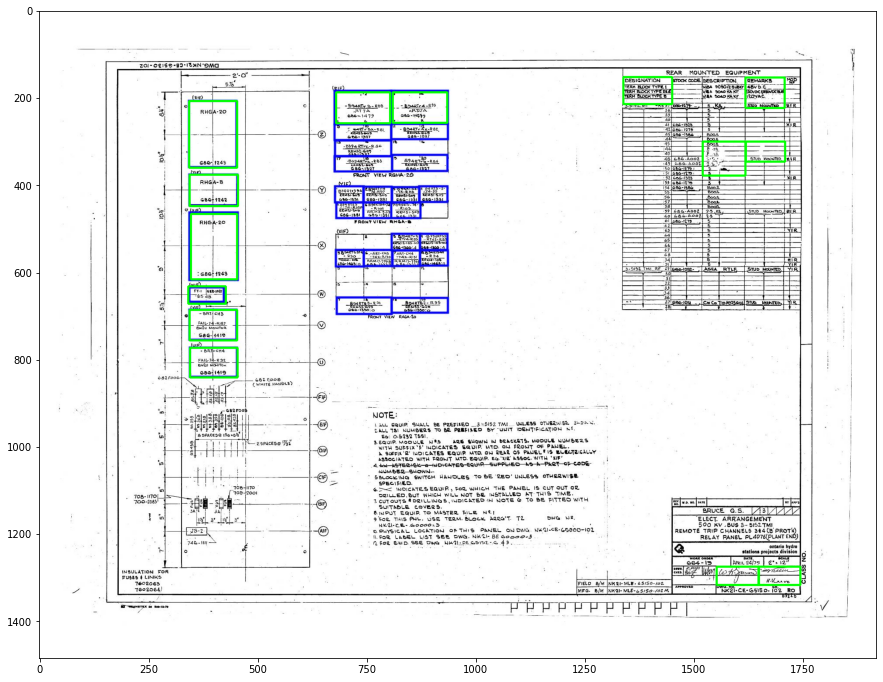

In [18]:
out_img = draw_rects(get_image(path), rects, thickness=3)

plt.figure(figsize=(15,20))
plt.imshow(out_img)
plt.show()